In [8]:
import pandas as pd

In [3]:
final_dataset = r"D:\F ML Lab\Project\ML\processed\FINAL_MASTER_DATASET.csv"
sample_dataset = r"D:\F ML Lab\Project\ML\processed\sample_dataset.csv"
sample_fraction = 0.05

df_final = pd.read_csv(final_dataset)
df_sample = df_final.sample(frac=sample_fraction, random_state=42)
print(f"New sample size: {len(df_sample)} rows.")
print(f"Saving new sample file to {sample_dataset}...")
df_sample.to_csv(sample_dataset, index=False)

C:\Users\RAM PRAHASITH\AppData\Local\Temp\ipykernel_24076\513416959.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(final_dataset)


New sample size: 727866 rows.
Saving new sample file to D:\F ML Lab\Project\ML\processed\sample_dataset.csv...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
SAMPLE_FILE = r"D:\F ML Lab\Project\ML\processed\sample_dataset.csv"
df = pd.read_csv(SAMPLE_FILE)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727866 entries, 0 to 727865
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   primaryid              727866 non-null  int64  
 1   caseid                 727866 non-null  int64  
 2   caseversion            727866 non-null  int64  
 3   i_f_code               727866 non-null  object 
 4   event_dt               344742 non-null  float64
 5   mfr_dt                 697240 non-null  float64
 6   init_fda_dt            727866 non-null  int64  
 7   fda_dt                 727866 non-null  object 
 8   rept_cod               727866 non-null  object 
 9   auth_num               47475 non-null   object 
 10  mfr_num                692045 non-null  object 
 11  mfr_sndr               724014 non-null  object 
 12  lit_ref                46918 non-null   object 
 13  age                    410654 non-null  float64
 14  age_cod                410674 non-nu

In [7]:
df.head(10)

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,reporter_country,occr_country,is_severe_outcome,drug_count,indication_count,reaction_count,all_reaction_pts,is_ineffective,therapy_duration_days,is_failure
0,127337111,12733711,1,I,201401.0,20160731.0,20160912,2016-09-12,PER,NaN,...,US,US,0,4,4,2,CONJUNCTIVAL HAEMORRHAGE IRON DEFICIENCY ANAEMIA,0,NaN,0
1,175404651,17540465,1,I,201912.0,20200304.0,20200313,2020-03-13,PER,NaN,...,US,US,0,2,2,1,DEVICE EXPULSION,0,NaN,0
2,216513911,21651391,1,I,NaN,20221018.0,20221128,2022-11-28,PER,NaN,...,US,US,0,1,1,2,MUSCULOSKELETAL STIFFNESS ARTHRALGIA,0,NaN,0
3,166753522,16675352,2,F,NaN,20190819.0,20190806,2019-08-27,EXP,NaN,...,US,US,1,0,1,1,HOSPITALISATION,0,NaN,1
4,150010251,15001025,1,I,NaN,20180608.0,20180612,2018-06-12,EXP,NaN,...,GB,GB,1,6,6,1,SPONDYLITIS,0,NaN,1
5,136437461,13643746,1,I,NaN,20170528.0,20170612,2017-06-12,PER,NaN,...,US,US,0,2,0,1,MOVEMENT DISORDER,0,NaN,0
6,143920973,14392097,3,F,20171209.0,20180407.0,20180116,2018-04-17,EXP,NaN,...,JP,JP,1,5,5,2,BLOOD PRESSURE DECREASED DEPRESSED LEVEL OF CO...,0,NaN,1
7,193676771,19367677,1,I,202002.0,20200817.0,20210602,2021-06-02,EXP,NaN,...,US,US,0,3,3,5,FATIGUE OSTEOARTHRITIS PRURITUS RASH THROAT TI...,0,NaN,0
8,227812761,22781276,1,I,20230731.0,20230731.0,20230803,2023-08-03,EXP,NaN,...,US,US,0,1,1,5,DEVICE DIFFICULT TO USE DRUG DOSE OMISSION BY ...,0,NaN,0
9,154618371,15461837,1,I,20180226.0,20180502.0,20181003,2018-10-03,EXP,NaN,...,IT,IT,0,1,1,1,TOXIC SKIN ERUPTION,0,NaN,0


In [8]:
columns_to_drop = [
    "caseid",
    "caseversion",
    "i_f_code",
    "auth_num",
    "mfr_num",
    "mfr_sndr",
    "lit_ref",
    "e_sub",
    "to_mfr",
    "occr_country",
    "event_dt",
    "mfr_dt",
    "init_fda_dt",
    "fda_dt",
    "rept_dt",
    "age_cod",
    "age_grp",
    "wt_cod",
    "wt",  # 82% null
    "is_severe_outcome",
    "is_ineffective",
    "therapy_duration_days",
]
df_clean = df.drop(columns=columns_to_drop)
print(f"\nDropped {len(columns_to_drop)} columns.")
print(f"New shape: {df_clean.shape}")

print("\n--- Final Clean Data Info ---")
print(df_clean.info())


Dropped 22 columns.
New shape: (727866, 11)

--- Final Clean Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727866 entries, 0 to 727865
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         727866 non-null  int64  
 1   rept_cod          727866 non-null  object 
 2   age               410654 non-null  float64
 3   sex               629118 non-null  object 
 4   occp_cod          705982 non-null  object 
 5   reporter_country  727863 non-null  object 
 6   drug_count        727866 non-null  int64  
 7   indication_count  727866 non-null  int64  
 8   reaction_count    727866 non-null  int64  
 9   all_reaction_pts  727866 non-null  object 
 10  is_failure        727866 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 61.1+ MB
None


In [9]:
print("\n--- First 5 Rows of Clean Data ---")
df_clean.head()


--- First 5 Rows of Clean Data ---


,primaryid,rept_cod,age,sex,occp_cod,reporter_country,drug_count,indication_count,reaction_count,all_reaction_pts,is_failure
0,127337111,PER,74.0,M,CN,US,4,4,2,CONJUNCTIVAL HAEMORRHAGE IRON DEFICIENCY ANAEMIA,0
1,175404651,PER,41.0,F,MD,US,2,2,1,DEVICE EXPULSION,0
2,216513911,PER,NaN,F,CN,US,1,1,2,MUSCULOSKELETAL STIFFNESS ARTHRALGIA,0
3,166753522,EXP,NaN,M,CN,US,0,1,1,HOSPITALISATION,1
4,150010251,EXP,NaN,F,OT,GB,6,6,1,SPONDYLITIS,1


In [10]:
age_median = df_clean["age"].median()
df_clean["age"] = df_clean["age"].fillna(age_median)
print(f"Filled 'age' NaNs with median value: {age_median}")

df_clean["sex"] = df_clean["sex"].fillna("UNK")
print("Filled 'sex' NaNs with 'UNK'")

df_clean["occp_cod"] = df_clean["occp_cod"].fillna("UNK")
print("Filled 'occp_cod' NaNs with 'UNK'")

original_rows = len(df_clean)
df_clean.dropna(subset=["reporter_country"], inplace=True)
print(f"Dropped {original_rows - len(df_clean)} rows with null 'reporter_country'")


# First, find the top 5 most frequent countries
top_5_countries = df_clean["reporter_country"].value_counts().head(5).index
print(f"Top 5 Countries: {list(top_5_countries)}")

# Now, replace any country NOT in this list with the new category 'OTHER'
df_clean["reporter_country"] = df_clean["reporter_country"].apply(
    lambda x: x if x in top_5_countries else "OTHER"
)

print("Simplified 'reporter_country' to Top 5 + 'OTHER'. New counts:")
print(df_clean["reporter_country"].value_counts())

# --- 5. Final Check ---
print("\n--- 5. Final Clean Data Info ---")
print("All columns should now be 100% non-null.")
print(df_clean.info())

print("\n--- First 5 Rows of Cleaned Data ---")
print(df_clean.head())

Filled 'age' NaNs with median value: 59.0
Filled 'sex' NaNs with 'UNK'
Filled 'occp_cod' NaNs with 'UNK'
Dropped 3 rows with null 'reporter_country'
Top 5 Countries: ['US', 'CA', 'COUNTRY NOT SPECIFIED', 'GB', 'JP']
Simplified 'reporter_country' to Top 5 + 'OTHER'. New counts:
reporter_country
US                       499486
OTHER                    125242
CA                        30329
COUNTRY NOT SPECIFIED     26359
GB                        24652
JP                        21795
Name: count, dtype: int64

--- 5. Final Clean Data Info ---
All columns should now be 100% non-null.
<class 'pandas.core.frame.DataFrame'>
Index: 727863 entries, 0 to 727865
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         727863 non-null  int64  
 1   rept_cod          727863 non-null  object 
 2   age               727863 non-null  float64
 3   sex               727863 non-null  object 
 4   occp_cod     

--- 1. Target Variable Distribution ---


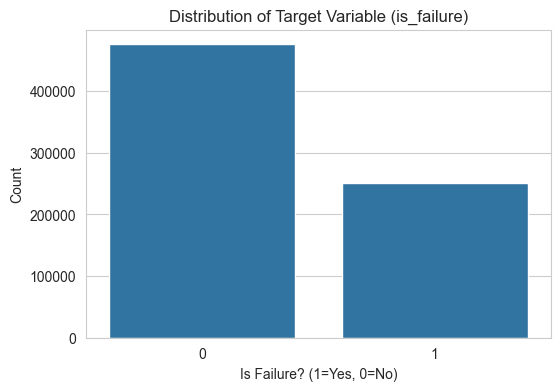

Percentage of Failure Reports: 34.60%
This shows if we have a class imbalance problem.

--- 2. Numeric Feature Distributions ---


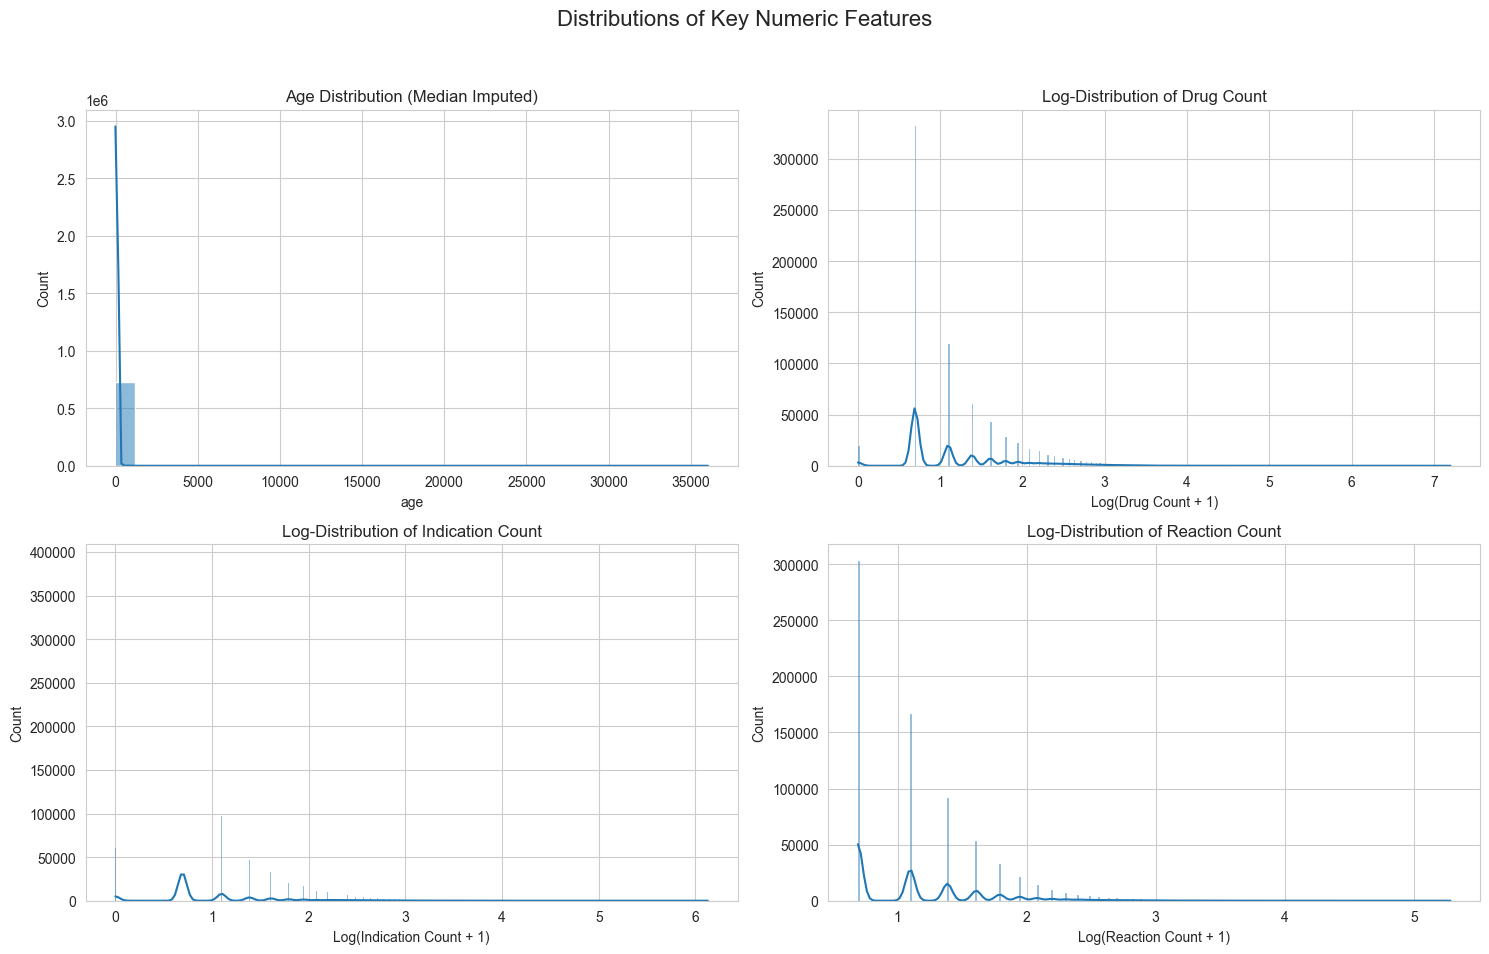


--- 3. Categorical Feature Distributions ---


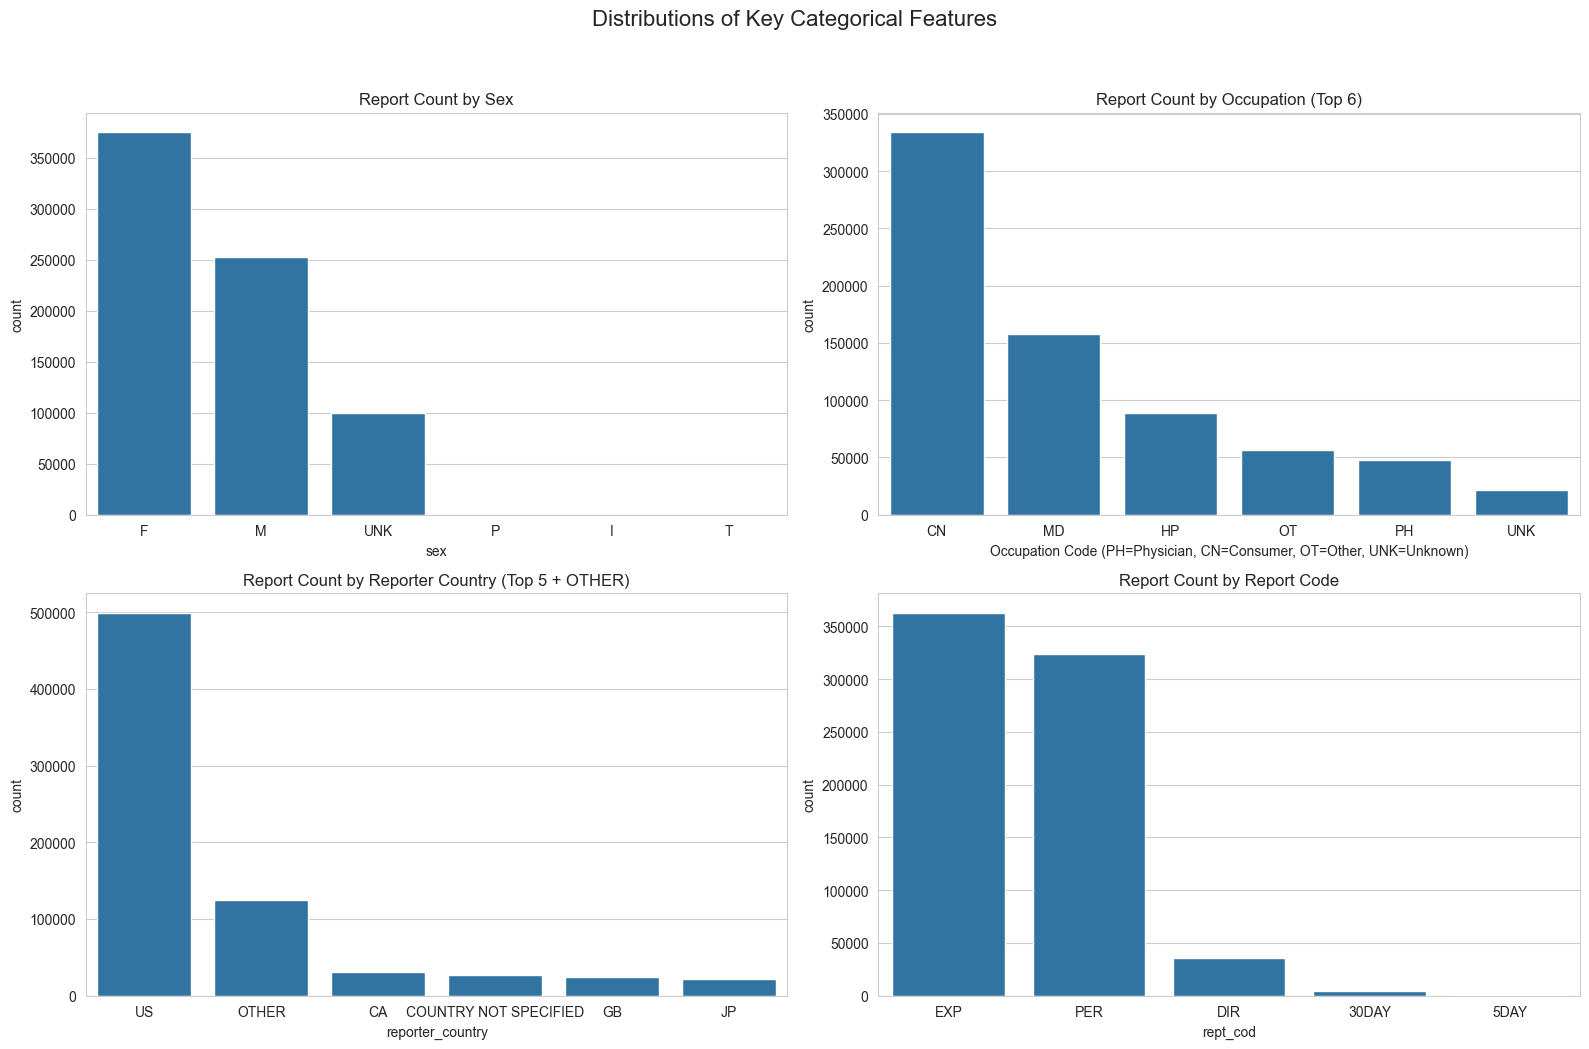


--- EDA Complete ---
This gives us a solid understanding of our data's shape and content.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for our plots
sns.set_style("whitegrid")

# We are using the df_clean DataFrame from the previous cell

# --- 1. Target Variable: `is_failure` ---
print("--- 1. Target Variable Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x="is_failure")
plt.title("Distribution of Target Variable (is_failure)")
plt.ylabel("Count")
plt.xlabel("Is Failure? (1=Yes, 0=No)")
plt.show()

# Calculate and print the exact percentage
failure_percentage = df_clean["is_failure"].mean() * 100
print(f"Percentage of Failure Reports: {failure_percentage:.2f}%")
print("This shows if we have a class imbalance problem.")

# --- 2. Numeric Features ---
print("\n--- 2. Numeric Feature Distributions ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distributions of Key Numeric Features", fontsize=16)

# Age
sns.histplot(df_clean["age"], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution (Median Imputed)")

# Drug Count (Log-transformed for better visibility)
# We use np.log1p which calculates log(1 + x) to handle drug_count=0
sns.histplot(np.log1p(df_clean["drug_count"]), kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Log-Distribution of Drug Count")
axes[0, 1].set_xlabel("Log(Drug Count + 1)")

# Indication Count (Log-transformed)
sns.histplot(np.log1p(df_clean["indication_count"]), kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Log-Distribution of Indication Count")
axes[1, 0].set_xlabel("Log(Indication Count + 1)")

# Reaction Count (Log-transformed)
sns.histplot(np.log1p(df_clean["reaction_count"]), kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Log-Distribution of Reaction Count")
axes[1, 1].set_xlabel("Log(Reaction Count + 1)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 3. Categorical Features ---
print("\n--- 3. Categorical Feature Distributions ---")
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle("Distributions of Key Categorical Features", fontsize=16)

# Sex
sns.countplot(
    data=df_clean, x="sex", order=df_clean["sex"].value_counts().index, ax=axes[0, 0]
)
axes[0, 0].set_title("Report Count by Sex")

# Occupation Code (Top 6)
top_6_occp = df_clean["occp_cod"].value_counts().head(6).index
sns.countplot(data=df_clean, x="occp_cod", order=top_6_occp, ax=axes[0, 1])
axes[0, 1].set_title("Report Count by Occupation (Top 6)")
axes[0, 1].set_xlabel(
    "Occupation Code (PH=Physician, CN=Consumer, OT=Other, UNK=Unknown)"
)

# Reporter Country
sns.countplot(
    data=df_clean,
    x="reporter_country",
    order=df_clean["reporter_country"].value_counts().index,
    ax=axes[1, 0],
)
axes[1, 0].set_title("Report Count by Reporter Country (Top 5 + OTHER)")

# Report Code
sns.countplot(
    data=df_clean,
    x="rept_cod",
    order=df_clean["rept_cod"].value_counts().index,
    ax=axes[1, 1],
)
axes[1, 1].set_title("Report Count by Report Code")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- EDA Complete ---")
print("This gives us a solid understanding of our data's shape and content.")

In [14]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.8 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.8 MB 5.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.8 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.8 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.8/8.8 MB 5.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.8/8.8 MB 5.6 MB/s eta 0:00:01
   -------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [17]:
print(f"Original shape before final cleaning: {df_clean.shape}")
original_count = len(df_clean)
df_processed = df_clean[(df_clean["age"] >= 0) & (df_clean["age"] <= 120)].copy()
print(
    f"Filtered {original_count - len(df_processed)} rows with impossible 'age' values."
)

# --- 2. Handle Missing Values (Imputation) ---
# We already did this in the previous cell, but it's good practice
# to re-run it in case the notebook is run out of order.

# Impute 'age' with median
median_age = df_processed["age"].median()
df_processed["age"] = df_processed["age"].fillna(median_age)

# Impute 'sex' and 'occp_cod' with 'UNK'
df_processed["sex"] = df_processed["sex"].fillna("UNK")
df_processed["occp_cod"] = df_processed["occp_cod"].fillna("UNK")

# Drop the 3 null 'reporter_country' rows
df_processed.dropna(subset=["reporter_country"], inplace=True)

print("Imputed all missing values for age, sex, and occp_cod.")

# --- 3. Simplify and Encode Categorical Features ---

# Simplify 'reporter_country' (Top 5 + OTHER)
top_5_countries = df_processed["reporter_country"].value_counts().head(5).index
df_processed["reporter_country"] = df_processed["reporter_country"].apply(
    lambda x: x if x in top_5_countries else "OTHER"
)
print("Simplified 'reporter_country'.")

# Define all categorical columns to encode
categorical_cols = ["rept_cod", "sex", "occp_cod", "reporter_country"]
print(f"Encoding categorical columns: {categorical_cols}")

# --- 4. Apply One-Hot Encoding ---
# This converts all text categories into 0s and 1s
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# --- 5. Final Check ---
print("\n--- Preprocessing Complete ---")
print("Your `df_processed` DataFrame is now 100% clean, imputed, and encoded.")
print(df_processed.info())

print("\n--- First 5 Rows of Preprocessed Data ---")
print(df_processed.head())

Original shape before final cleaning: (727863, 11)
Filtered 3024 rows with impossible 'age' values.
Imputed all missing values for age, sex, and occp_cod.
Simplified 'reporter_country'.
Encoding categorical columns: ['rept_cod', 'sex', 'occp_cod', 'reporter_country']

--- Preprocessing Complete ---
Your `df_processed` DataFrame is now 100% clean, imputed, and encoded.
<class 'pandas.core.frame.DataFrame'>
Index: 724839 entries, 0 to 727865
Data columns (total 26 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   primaryid                               724839 non-null  int64  
 1   age                                     724839 non-null  float64
 2   drug_count                              724839 non-null  int64  
 3   indication_count                        724839 non-null  int64  
 4   reaction_count                          724839 non-null  int64  
 5   all_reaction_pts            

In [ ]:
"D:\F ML Lab\Project\ML\processed\PROJECT_CLEANED_DATA.csv"CLEAN_DATA_FILE = r

print(f"Saving fully processed DataFrame to {CLEAN_DATA_FILE}...")

try:
    df_processed.to_csv(CLEAN_DATA_FILE, index=False)
    print("✅ Success! Your data is now 100% preprocessed and saved.")
    print("For all future modeling steps, you can just load this one file.")
except Exception as e:
    print(f"An error occurred while saving: {e}")


Saving fully processed DataFrame to D:\F ML Lab\Project\ML\processed\PROJECT_CLEANED_DATA.csv...
✅ Success! Your data is now 100% preprocessed and saved.
For all future modeling steps, you can just load this one file.


In [17]:
df1 = pd.read_csv("D:/F ML Lab/Project/ML/processed/PROJECT_CLEANED_DATA.csv")
df1.head()

,primaryid,age,drug_count,indication_count,reaction_count,all_reaction_pts,is_failure,rept_cod_5DAY,rept_cod_DIR,rept_cod_EXP,...,occp_cod_HP,occp_cod_LW,occp_cod_MD,occp_cod_OT,occp_cod_PH,occp_cod_UNK,reporter_country_COUNTRY NOT SPECIFIED,reporter_country_GB,reporter_country_OTHER,reporter_country_US
0,127337111,74.0,4,4,2,CONJUNCTIVAL HAEMORRHAGE IRON DEFICIENCY ANAEMIA,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,175404651,41.0,2,2,1,DEVICE EXPULSION,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,216513911,59.0,1,1,2,MUSCULOSKELETAL STIFFNESS ARTHRALGIA,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,166753522,59.0,0,1,1,HOSPITALISATION,1,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,150010251,59.0,6,6,1,SPONDYLITIS,1,False,False,True,...,False,False,False,True,False,False,False,True,False,False
